__Eithar Elfatih Burie Abdelrahman DS2403__

 <div style= 'background-color: blue; color: orange;  padding :10px;'>
<h1>  Zomato Restaurant</h1>
 </div>
 


 <div style= 'color: orange;  padding :10px;'>
<h2> Problem Identification</h2>
 </div>

 <div style= 'color: blue;  padding :10px;'><h3> Project Description</h3>
 </div>

Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

Data Storage:
This problem statement contains two datasets- Zomato.csv and country_code.csv.
Country_code.csv contains two variables:

    • Country code
    • Country name

The collected data has been stored in the Comma Separated Value file Zomato.csv. Each
restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:

    • Restaurant Id: Unique id of every restaurant across various cities of the world
    • Restaurant Name: Name of the restaurant
    • Country Code: Country in which restaurant is located
    • City: City in which restaurant is located
    • Address: Address of the restaurant
    • Locality: Location in the city
    • Locality Verbose: Detailed description of the locality
    • Longitude: Longitude coordinate of the restaurant&#39;s location
    • Latitude: Latitude coordinate of the restaurant&#39;s location
    • Cuisines: Cuisines offered by the restaurant
    • Average Cost for two: Cost for two people in different currencies ��
    • Currency: Currency of the country
    • Has Table booking: yes/no
    • Has Online delivery: yes/ no
    • Is delivering: yes/ no
    • Switch to order menu: yes/no
    • Price range: range of price of food
    • Aggregate Rating: Average rating out of 5
    • Rating color: depending upon the average rating color
    • Rating text: text on the basis of rating of rating
    • Votes: Number of ratings casted by people

Problem statement : In this dataset predict 2 things –
1) Average Cost for two
2) Price range


Hint : Use pandas methods to combine all the datasets and then start working on this project.

Dataset Link-  https://github.com/dsrscientist/dataset4/blob/main/zomato.csv




__________________________

 <div style= 'background-color: blue; color: orange;  padding :10px;'> <h1> Import necessary libraries</h1>  </div>


In [1]:
#Import necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import sklearn

import re
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from joblib import load
from sklearn.svm import SVR 
from scipy.stats import skew, stats, boxcox,yeojohnson
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor,GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score


 <div style= 'background-color: orange; color: blue;  padding :10px;'> <h1> Loading Data</h1>  </div>


In [2]:
#read dataset
URL=r"C:\Users\eitha\OneDrive\Documents\data science\datatrained\flip robo internship\evaluation projects\phase 3\zomato.csv"
zomato_=pd.read_csv(URL,encoding='ISO-8859-1')


_______

 <div style= 'background-color: orange; color: blue;  padding :10px;'> <h1> Exploratory Data Analysis</h1>  </div>


<div style= 'color: blue;  padding :10px;'><h3>a. Head / Tail</h3>
 </div>


In [3]:
#create dataframe of csv
df=pd.DataFrame(zomato_)
df.index=df.index+1

#show max
pd.set_option('Display.max_columns', None)

#show dataset head 
df.head(20)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
1,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
2,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
3,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
4,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
5,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
6,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,1000,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
7,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",2000,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
8,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",2000,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
9,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",6000,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
10,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


In [4]:
#show dataset tail
df.tail(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9542,5905215,Emirgan Sí_tiô,208,ÛÁstanbul,"Emirgan Mahallesi, SakÛ±p SabancÛ± Caddesi, No...",Emirgí¢n,"Emirgí¢n, ÛÁstanbul",29.056620,41.104969,"Restaurant Cafe, Turkish, Desserts",75,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,877
9543,5926979,Leman Kí_ltí_r,208,ÛÁstanbul,"CaferaÛôa Mahallesi, Neôet í_mer Sokak, No 9/...",KadÛ±kí_y Merkez,"KadÛ±kí_y Merkez, ÛÁstanbul",29.022805,40.989705,Restaurant Cafe,80,Turkish Lira(TL),No,No,No,No,3,3.7,Yellow,Good,506
9544,5916085,Dem Karakí_y,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, Hoca Ta...",Karakí_y,"Karakí_y, ÛÁstanbul",28.978237,41.024633,Cafe,35,Turkish Lira(TL),No,No,No,No,2,4.5,Dark Green,Excellent,761
9545,5915547,Karakí_y Gí_llí_oÛôlu,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977636,41.022904,"Desserts, Bí_rek",40,Turkish Lira(TL),No,No,No,No,2,4.7,Dark Green,Excellent,1305
9546,5915054,Baltazar,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, KÛ±lÛ±í...",Karakí_y,"Karakí_y, ÛÁstanbul",28.981103,41.025785,"Burger, Izgara",90,Turkish Lira(TL),No,No,No,No,3,4.3,Green,Very Good,870
9547,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9548,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9549,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9550,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9551,5927402,Walter's Coffee Roastery,208,ÛÁstanbul,"CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...",Moda,"Moda, ÛÁstanbul",29.026016,40.984776,Cafe,55,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


Here we have a brief idea about the size and layout of the dataset.

 <div style= 'color: orange;  padding :10px;'><h3>b.Data Structure</h3>
 </div>


 <div style= 'color: blue;  padding :10px;'><h4>Size, Shape and Columns</h4>
 </div>


In [5]:
# show size/shapecolumns of our dataset.
print('The dataset has a size of:',df.size)
print('The dataset has a shape:',df.shape)
print('The dataset has a set of columns:\n',df.columns)

The dataset has a size of: 200571
The dataset has a shape: (9551, 21)
The dataset has a set of columns:
 Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


 <div style= 'color: blue;  padding :10px;'><h2>c.Info</h2>
 </div>

In [6]:
#Show information about the dataframe a
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 1 to 9551
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

 <div style= 'color: blue;  padding :10px;'><h3>d. Data type</h3>
 </div>

In [7]:
# show data types sorted
print('The data type of each column is as follows:\n')
print(df.dtypes.sort_values())

The data type of each column is as follows:

Restaurant ID             int64
Price range               int64
Average Cost for two      int64
Votes                     int64
Country Code              int64
Aggregate rating        float64
Longitude               float64
Latitude                float64
Rating color             object
Restaurant Name          object
Switch to order menu     object
Is delivering now        object
Has Online delivery      object
City                     object
Rating text              object
Cuisines                 object
Locality Verbose         object
Locality                 object
Address                  object
Has Table booking        object
Currency                 object
dtype: object


After checking the basic information of our dataset, we can observe the following: 

- The data set is large consisting of 9551 rows and 21 columns. 
- There are three data types: int64, float64  and object so we are working with both numerical and categorical data
- From df.info we can see that there are a small amount of null values in 1 columns.  i will sort this immediately



In [8]:
df.nunique().to_frame()

,0
Restaurant ID,9551
Restaurant Name,7446
Country Code,15
City,141
Address,8918
Locality,1208
Locality Verbose,1265
Longitude,8120
Latitude,8677
Cuisines,1825


Restaurant ID- has all unique values, which isnt useful to our analysis , so i will drop it 

Restaurant Name also seems uselss to predicting price

Switch to order menu' has only 1 unique value so i will drop this 

address also seems to detailed and of no use to use in the dataset

locality Verbose is very similar to locality so i will also drop this

In [9]:
#remove Restaurant ID from dataframe
df.drop(columns=['Restaurant ID', 'Restaurant Name','Switch to order menu', 'Address', 'Locality Verbose'], axis=1, inplace=True)
df.shape  

(9551, 16)

 <div style= 'background-color: orange; color: white;  padding :10px;'> <h1> Objective</h1>  </div>


__To analyse the dataset from Zomato to understand the influences of varying factors to do with the pricing (‘Average cost for two’ and ‘ Price range’.) through this investigation I will be building two models based on these to features. As both features are continuous the model will be regression models.__


<div style= 'color: orange;  padding :10px;'><h3>Feature types</h3>
 </div>

In [10]:
#move Targets to first columns
# list of columns 
cols_=list(df.columns)

targets_=['Average Cost for two', 'Price range']

for t in targets_:
    cols_.remove(t)


order_=targets_ + cols_

df=df[order_]



df.sample(5)

,Average Cost for two,Price range,Country Code,City,Locality,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating color,Rating text,Votes
9430,250,4,166,Doha,"Mall of Qatar, Al Gharafa",51.350047,25.327333,"Steak, American",Qatari Rial(QR),No,No,No,4.0,Green,Very Good,41
6418,1200,3,1,New Delhi,Punjabi Bagh,77.119769,28.666848,"Chinese, Thai",Indian Rupees(Rs.),Yes,Yes,No,3.4,Orange,Average,84
403,10,1,216,Pocatello,Pocatello,-112.436500,42.860400,"Pizza, Sandwich",Dollar($),No,No,No,3.8,Yellow,Good,160
6695,500,2,1,New Delhi,Rajouri Garden,77.120964,28.645419,"Chinese, North Indian, Street Food",Indian Rupees(Rs.),No,Yes,No,3.6,Yellow,Good,74
4157,350,1,1,New Delhi,Jama Masjid,77.233564,28.648753,"North Indian, Mughlai",Indian Rupees(Rs.),No,No,No,3.0,Orange,Average,6


In [11]:
df.shape

(9551, 16)

<div style= 'color: blue;  padding :10px;'><h3>Map new Features</h3>
 </div>

<div style= 'color: blue;  padding :10px;'><h3>Define Feature Categories</h3>
 </div>

In [12]:
# create target variable
t1='Average Cost for two'
t2='Price range'
# create categorical and numerical list (without targets)

num_cols=[]
cat_cols=[]

for col in df.dtypes.index:
    if col == t1 or col == t2:
        continue
    if df.dtypes[col] in ['int64','float64']:
        num_cols.append(col)
    elif df.dtypes[col] in ['object']:
        cat_cols.append(col)
              
print(f'Numerical columns: \n{num_cols}')
print(len(num_cols))
print(f'\nCategorical columns:\n {cat_cols}')    
print(len(cat_cols))

Numerical columns: 
['Country Code', 'Longitude', 'Latitude', 'Aggregate rating', 'Votes']
5

Categorical columns:
 ['City', 'Locality', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Rating color', 'Rating text']
9


__________________________

 <div style= 'background-color: orange; color: blue;  padding :10px;'> <h1>Data Pre-processing </h1>  </div>



<div style= 'color: orange;  padding :10px;'><h3>Duplicates</h3>
 </div>


In [13]:
#indentify amount of duplicates (if any)
print('From this, we can see there are no duplicates in this data set.')
df.duplicated().sum()

From this, we can see there are no duplicates in this data set.


2

In [14]:
print('Number of rows before dropping duplicates', len(df))
#delete duplicated rows
df=df.drop_duplicates()
print('Number of rows after dropping duplicates', len(df))

Number of rows before dropping duplicates 9551
Number of rows after dropping duplicates 9549


In [15]:
# sum of missing values in data set 
print('From this, we can see there are many null values in the data set. Now i will investigate further and either drop or impute')
df.isnull().sum()

From this, we can see there are many null values in the data set. Now i will investigate further and either drop or impute


Average Cost for two    0
Price range             0
Country Code            0
City                    0
Locality                0
Longitude               0
Latitude                0
Cuisines                9
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [16]:
df['Cuisines'].fillna(df['Cuisines'].mode()[0], inplace=True)

In [17]:
df.isnull().sum().sum()

0

<div style= 'color: orange;  padding :10px;'><h3>Heatmap of nulls</h3>
 </div>

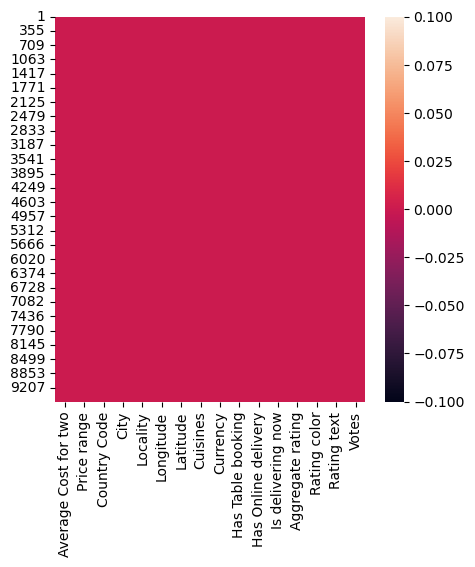

In [18]:
plt.figure(figsize=(5,5))
sns.heatmap(df.isna())
plt.show()

- There are no missing values in our datset.

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Average Cost for two,9549.0,1199.399099,16122.866167,0.000000,250.000000,400.000000,700.000000,800000.000000
Price range,9549.0,1.805006,0.905629,1.000000,1.000000,2.000000,2.000000,4.000000
Country Code,9549.0,18.369253,56.755932,1.000000,1.000000,1.000000,1.000000,216.000000
Longitude,9549.0,64.140006,41.461012,-157.948486,77.081404,77.191964,77.282017,174.832089
Latitude,9549.0,25.859796,11.002726,-41.330428,28.478751,28.570470,28.642762,55.976980
Aggregate rating,9549.0,2.666928,1.516045,0.000000,2.500000,3.200000,3.700000,4.900000
Votes,9549.0,156.942612,430.208201,0.000000,5.000000,31.000000,131.000000,10934.000000


OBSERVATION:
Mean is less than Median for Longitude, Latitude, Price range, Aggregate rating. For those columns it is left skewed data.
Mean is greater than Median for Average Cost for two, Votes.
In all the columns it is noticed that there is huge differnce between max and Quartile 3(75%). Hense lots of outliers afre present in the dataset.

In [20]:
df.describe(include='object').T

,count,unique,top,freq
City,9549,141,New Delhi,5471
Locality,9549,1208,Connaught Place,122
Cuisines,9549,1825,North Indian,945
Currency,9549,12,Indian Rupees(Rs.),8650
Has Table booking,9549,2,No,8391
Has Online delivery,9549,2,No,7098
Is delivering now,9549,2,No,9515
Rating color,9549,6,Orange,3737
Rating text,9549,6,Average,3737


- all counts are 9551 except cuinsine which is missing a few. , this can be sorted 
- mean is higher than meadian for Average Cost for two as well as votes. 
- mean is lower than median for Longitude, Latitude, Pric range and Agreegeate rating
- with the large difference in max and qualtilesz, we can gather than there are many outliers present .

_____________________________________

  <div style= 'background-color: orange; color: blue;  padding :10px;'> <h1>Visual Analysis</h1>  </div>




 <div style= 'color: orange;  padding :10px;'> <h2> Univariate analysis</h2>  </div>
  <div style= 'color: blue;  padding :10px;'> <h3> Target variables</h3></div>
  <div style= 'color: blue;  padding :10px;'> <h3> t1- 'Average Cost for two'</h3></div>

In [21]:
df['Average Cost for two'].value_counts()

500       900
300       895
400       857
200       687
600       652
         ... 
8000        1
2350        1
150000      1
70000       1
545         1
Name: Average Cost for two, Length: 140, dtype: int64

In [22]:
df['Average Cost for two'].nunique()

140

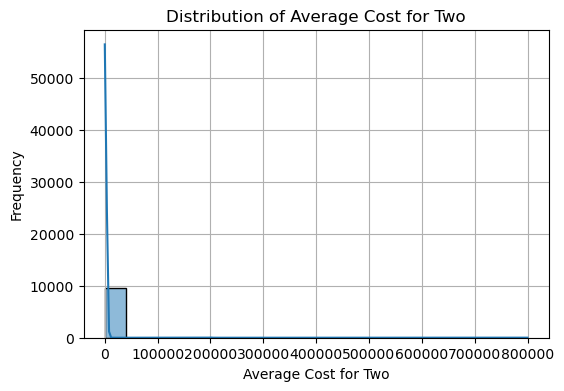

In [23]:
plt.figure(figsize=(6,4))
sns.histplot(df['Average Cost for two'], bins=20, kde=True)
plt.title('Distribution of Average Cost for Two')
plt.xlabel('Average Cost for Two')
plt.ylabel('Frequency')
plt.grid(True)


- Average Cost for two is skewed to the right


  <div style= 'color: blue;  padding :10px;'> <h3> t2- 'Price range'</h3></div>

In [24]:
df['Price range'].value_counts()

1    4442
2    3113
3    1408
4     586
Name: Price range, dtype: int64

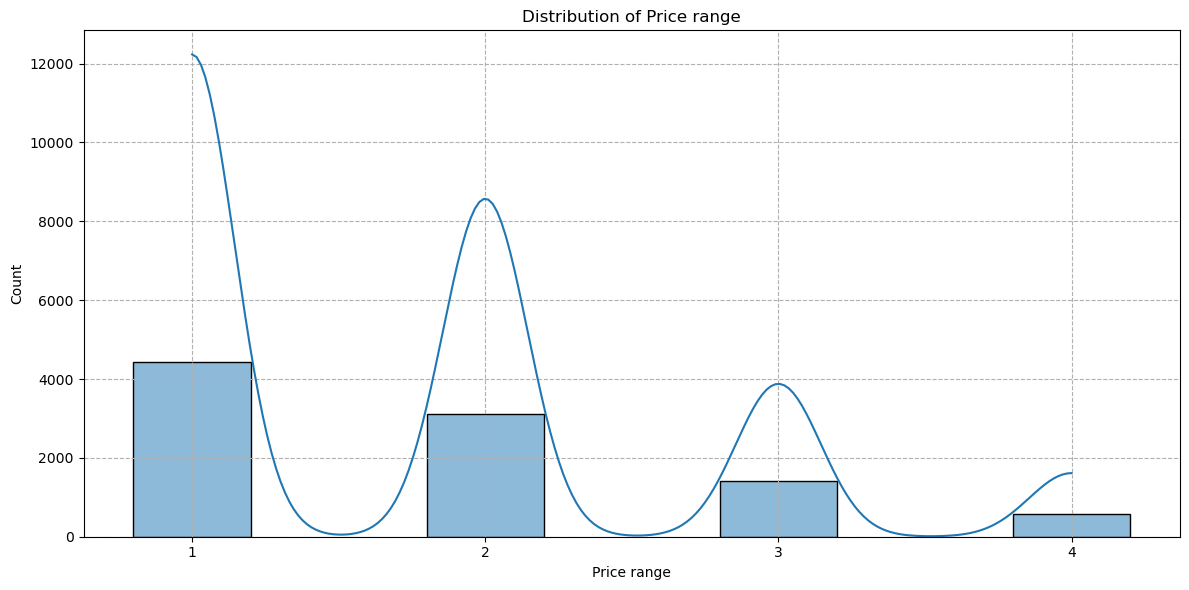

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(x=t2, data=df, palette='Set2', bins=[1,2,3,4], discrete=True, shrink=0.4,kde=True) 
plt.title(f'Distribution of {t2}', fontsize=12)
plt.xticks(rotation=0, ticks=[1,2,3,4], labels=[1,2,3,4])
plt.grid(which='both', linestyle='--')

plt.tight_layout()
plt.show()



- Price range is also skewed to the right 

 <div style= 'color: blue;  padding :10px;'> <h2> Independant variables</h2>  </div>

 <div style= 'color: orange;  padding :10px;'> <h3> Categorical Columns</h3>  </div>

In [26]:
cat_cols

['City',
 'Locality',
 'Cuisines',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Rating color',
 'Rating text']

 <div style= 'color: blue;  padding :10px;'> <h4>Cuisines</h4>  </div>

In [27]:
cuisines=list(df['Cuisines'])

#find max number of titles 
max_c= 1
for i in cuisines:
    if len(i.split(',')) > max_c:
        max_c=len(i.split(','))

print('\n\nMaximum cuisines per restaurant:', max_c)

all_cuisines=[]

for i in cuisines:
    if len(i.split(','))==1:
        all_cuisines.append(i.split(',')[0].strip().title())
    else:
        for j in range(len(i.split(','))):
            all_cuisines.append(i.split(',')[j].strip().title())

print('\n\nNumber of Unique cuisines:',len(pd.Series(all_cuisines).unique()))
print('\n\nunique cuisines:\n\n', pd.Series(all_cuisines).unique())

all_cusines=list(pd.Series(all_cuisines).unique())
    



Maximum cuisines per restaurant: 8


Number of Unique cuisines: 145


unique cuisines:

 ['French' 'Japanese' 'Desserts' 'Seafood' 'Asian' 'Filipino' 'Indian'
 'Sushi' 'Korean' 'Chinese' 'European' 'Mexican' 'American' 'Ice Cream'
 'Cafe' 'Italian' 'Pizza' 'Bakery' 'Mediterranean' 'Fast Food' 'Brazilian'
 'Arabian' 'Bar Food' 'Grill' 'International' 'Peruvian' 'Latin American'
 'Burger' 'Juices' 'Healthy Food' 'Beverages' 'Lebanese' 'Sandwich'
 'Steak' 'Bbq' 'Gourmet Fast Food' 'Mineira' 'North Eastern'
 'North Indian' 'Coffee And Tea' 'Vegetarian' 'Tapas' 'Breakfast' 'Diner'
 'Southern' 'Southwestern' 'Spanish' 'Argentine' 'Caribbean' 'German'
 'Vietnamese' 'Thai' 'Modern Australian' 'Teriyaki' 'Cajun' 'Canadian'
 'Tex-Mex' 'Middle Eastern' 'Greek' 'Bubble Tea' 'Tea' 'Australian'
 'Fusion' 'Cuban' 'Hawaiian' 'Salad' 'Irish' 'New American' 'Soul Food'
 'Turkish' 'Pub Food' 'Persian' 'Continental' 'Singaporean' 'Malay'
 'Cantonese' 'Dim Sum' 'Western' 'Finger Food' 'British' 'Deli'
 '

In [28]:
cuisine_groups={}

cuisine_patterns= {
    'Indian': r'Indian|Dí_Ner|Curry|Izgara|Durban|Kebab|Mangalorean|Sunda|Malwani|Andhra|Assamese|Awadhi|Bihari|Oriya|Lucknowi|Kashmiri|Kerala|Parsi|Mithai|Modern Indian|Chettinad|Maharashtrian|Gujarati|Goan|North Eastern|North Indian|Vegetarian|Southern|Southwestern|Mughlai|Biryani|South Indian|Hyderabadi|Rajasthani',
    'Asian' : r'Pakistani|Asian Fusion|Ramen|Sri Lankan|Taiwanese|Nepalese|Bengali|Tibetan|Malaysian|Burmese|Indonesian|Japanese|Asian|Seafood|Filipino|Sushi|Korean|Chinese|Vietnamese|Thai|Teriyaki|Singaporean|Dim Sum|Malay|Cantonese', 
    'European':r'French|Turkish Pizza|Scottish|Belgian|Armenian|Portuguese|European|Italian|Mediterranean|Tapas|Spanish|German|Greek|Irish|Turkish|Pub Food|British',
    'African': r'African|Moroccan|South African',
    'Middle Eastern': r' Arabian|Iranian|Lebanese|Middle Eastern|Persian|Afghani',
    'Latin American': r'Mexican|South American|Brazilian|Peruvian|Latin American|Mineira|Argentine|Cajun|Cuban',
    'Western': r'American|Diner|Caribbean|Modern Australian|Canadian|Tex-Mex|Australian|Hawaiian|New American|Soul Food|Western',
    'Desserts': r'Desserts|Ice Cream|Patisserie',
    'Beverages': r'Juices|Coffee And Tea|Bubble Tea|Tea|Drinks Only',
    'Fastfood': r'Pizza|Fast Food|Burger|Beverages|Sandwich|Finger Food|Street Food',
    'Other': r'Deli|Bí_Rek|Restaurant CafeWorld Cuisine|Contemporary|Fish And Chips|Kiwi|Cuisine Varies|Raw Meats|Charcoal Grill|Cafe|Bakery|Bar Food|Grill|International|Healthy Food|Steak|Bbq|Gourmet Fast Food|Vegetarian|Breakfast|Fusion|Salad|Continental',
}
for cuisine in cuisines:
    matched= False
    for cuisine_group, pat in cuisine_patterns.items():
        if re.search(pat, cuisine, re.IGNORECASE):
            cuisine_groups.setdefault(cuisine_group,[]).append(cuisine)
            matched=True 
            break
    if not matched:
        cuisine_groups.setdefault('Other Cuisines', []).append(cuisine)
#print
for group, members in cuisine_groups.items():
        print(f'{group}: {len(members)}')

Asian: 1159
Indian: 4874
Western: 251
European: 520
Other: 637
Latin American: 100
Fastfood: 1264
Other Cuisines: 5
Desserts: 638
Beverages: 75
Middle Eastern: 22
African: 4


In [29]:
# make a diction to map titles to groups
cuisine_to_group={}

for cuisine in cuisines:
    if cuisine == 'None':
        cuisine_to_group[cuisine] = 'None'
    else:
        matched = False
        for cuisine_group, pat in cuisine_patterns.items():
            if re.search(pat, cuisine, re.IGNORECASE):
                cuisine_to_group[cuisine]= cuisine_group
                matched = True 
                break 
        if not matched:
                cuisine_to_group[cuisine] = 'Other Cuisines'
                
#map
df['Cuisine_type'] = df['Cuisines'].map(cuisine_to_group)

df.head(20)

,Average Cost for two,Price range,Country Code,City,Locality,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating color,Rating text,Votes,Cuisine_type
1,1100,3,162,Makati City,"Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,4.8,Dark Green,Excellent,314,Asian
2,1200,3,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,4.5,Dark Green,Excellent,591,Asian
3,4000,4,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,4.4,Green,Very Good,270,Indian
4,1500,4,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,4.9,Dark Green,Excellent,365,Asian
5,1500,4,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,4.8,Dark Green,Excellent,229,Asian
6,1000,3,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.056314,14.583764,Chinese,Botswana Pula(P),No,No,No,4.4,Green,Very Good,336,Asian
7,2000,4,162,Pasay City,"SM by the Bay, Mall of Asia Complex, Pasay City",120.979667,14.531333,"Asian, European",Botswana Pula(P),Yes,No,No,4.0,Green,Very Good,520,Asian
8,2000,4,162,Pasay City,"SM by the Bay, Mall of Asia Complex, Pasay City",120.979333,14.540000,"Seafood, Filipino, Asian, European",Botswana Pula(P),Yes,No,No,4.2,Green,Very Good,677,Asian
9,6000,4,162,Pasay City,"Sofitel Philippine Plaza Manila, Pasay City",120.980090,14.552990,"European, Asian, Indian",Botswana Pula(P),Yes,No,No,4.9,Dark Green,Excellent,621,Indian
10,1100,3,162,Pasig City,Kapitolyo,121.056532,14.572041,Filipino,Botswana Pula(P),Yes,No,No,4.8,Dark Green,Excellent,532,Asian


In [30]:
#remove Restaurant ID from dataframe
df.drop(columns=['Cuisines'], axis=1, inplace=True)
df.shape  

(9549, 16)

In [31]:
cat_cols.remove('Cuisines')
cat_cols.append('Cuisine_type')


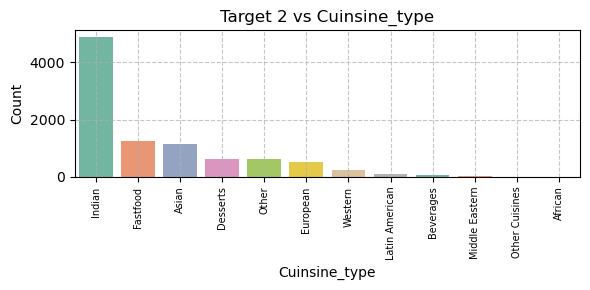

In [32]:
cuisine_type_count= df['Cuisine_type'].value_counts()

plt.figure(figsize=(6,3))
sns.barplot(x=cuisine_type_count.index, y=cuisine_type_count, palette='Set2')
plt.xlabel('Cuinsine_type')
plt.ylabel('Count')
plt.title('Target 2 vs Cuinsine_type')
plt.xticks(rotation=90, fontsize=7)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

-majority is what we would expect to be indian, as this is the majority of of restaurant locations. asian and general fast food are next.

 <div style= 'color: blue;  padding :10px;'> <h4>Currency</h4>  </div>

In [33]:
print(df['Currency'].value_counts(normalize=True)*100)

Indian Rupees(Rs.)        90.585402
Dollar($)                  5.047649
Pounds(£)                 0.837784
Brazilian Real(R$)         0.628338
Emirati Diram(AED)         0.628338
Rand(R)                    0.628338
NewZealand($)              0.418892
Turkish Lira(TL)           0.356058
Botswana Pula(P)           0.230391
Indonesian Rupiah(IDR)     0.219918
Qatari Rial(QR)            0.209446
Sri Lankan Rupee(LKR)      0.209446
Name: Currency, dtype: float64


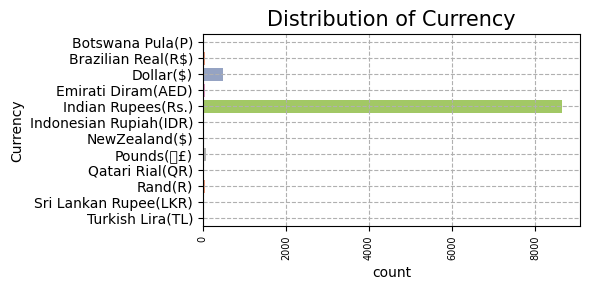

In [34]:
plt.figure(figsize=(6,3))
sns.countplot(y='Currency', data=df, palette='Set2') 
plt.title('Distribution of Currency', fontsize=15)
plt.xticks(rotation=90, fontsize=7)
plt.ylabel('Currency')
plt.xlabel('count')
plt.grid(which='both', linestyle='--')

plt.tight_layout()
plt.show()

- 90.5% of the distribution of currency is indian rupees. 
- does this affect the price average???

 <div style= 'color: blue;  padding :10px;'> <h4>Has Table booking</h4>  </div>

In [35]:
print(df['Has Table booking'].value_counts())

No     8391
Yes    1158
Name: Has Table booking, dtype: int64


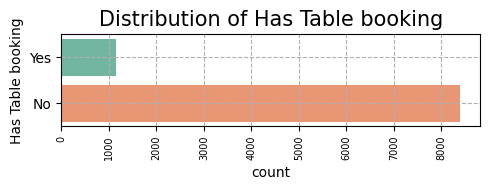

In [36]:
plt.figure(figsize=(5,2))
sns.countplot(y='Has Table booking', data=df, palette='Set2') 
plt.title('Distribution of Has Table booking', fontsize=15)
plt.xticks(rotation=90, fontsize=7)
plt.ylabel('Has Table booking')
plt.xlabel('count')
plt.grid(which='both', linestyle='--')

plt.tight_layout()
plt.show()

In [37]:
print(df['Has Table booking'].value_counts(normalize=True)*100)

No     87.873076
Yes    12.126924
Name: Has Table booking, dtype: float64


over 87% of restaurants do not have table booking

 <div style= 'color: blue;  padding :10px;'> <h4>Has Online delivery</h4>  </div>

In [38]:
print(df['Has Online delivery'].value_counts())

No     7098
Yes    2451
Name: Has Online delivery, dtype: int64


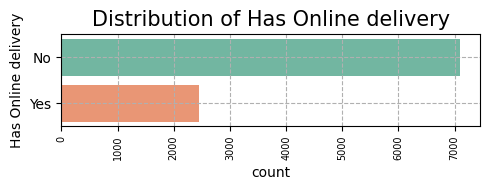

In [39]:
plt.figure(figsize=(5,2))
sns.countplot(y='Has Online delivery', data=df, palette='Set2') 
plt.title('Distribution of Has Online delivery', fontsize=15)
plt.xticks(rotation=90, fontsize=7)
plt.ylabel('Has Online delivery')
plt.xlabel('count')
plt.grid(which='both', linestyle='--')

plt.tight_layout()
plt.show()

In [40]:
print(df['Has Online delivery'].value_counts())

No     7098
Yes    2451
Name: Has Online delivery, dtype: int64


 <div style= 'color: blue;  padding :10px;'> <h4>Is delivering now</h4>  </div>

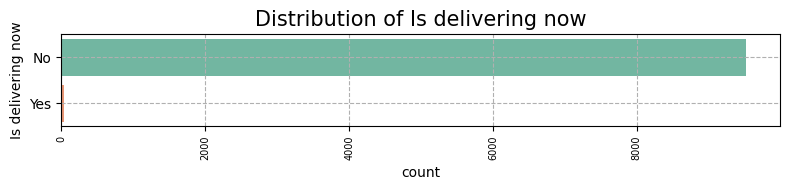

In [41]:
plt.figure(figsize=(8,2))
sns.countplot(y='Is delivering now', data=df, palette='Set2') 
plt.title('Distribution of Is delivering now', fontsize=15)
plt.xticks(rotation=90, fontsize=7)
plt.ylabel('Is delivering now')
plt.xlabel('count')
plt.grid(which='both', linestyle='--')

plt.tight_layout()
plt.show()

In [42]:
print(df['Is delivering now'].value_counts())

No     9515
Yes      34
Name: Is delivering now, dtype: int64


- this has anoverwhelming majority of 'no' answers 
- is this worth keeping?


 <div style= 'color: blue;  padding :10px;'> <h4>Rating color</h4>  </div>

In [43]:
print(df['Rating color'].value_counts())

Orange        3737
White         2146
Yellow        2100
Green         1079
Dark Green     301
Red            186
Name: Rating color, dtype: int64


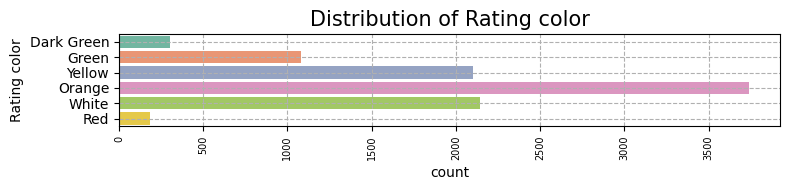

In [44]:
plt.figure(figsize=(8,2))
sns.countplot(y='Rating color', data=df, palette='Set2') 
plt.title('Distribution of Rating color', fontsize=15)
plt.xticks(rotation=90, fontsize=7)
plt.ylabel('Rating color')
plt.xlabel('count')
plt.grid(which='both', linestyle='--')

plt.tight_layout()
plt.show()

 <div style= 'color: blue;  padding :10px;'> <h4>Rating text</h4>  </div>

In [45]:
print(df['Rating text'].value_counts())

Average      3737
Not rated    2146
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: Rating text, dtype: int64


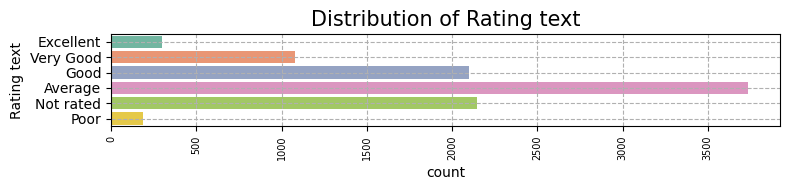

In [46]:
plt.figure(figsize=(8,2))
sns.countplot(y='Rating text', data=df, palette='Set2') 
plt.title('Distribution of Rating text', fontsize=15)
plt.xticks(rotation=90, fontsize=7)
plt.ylabel('Rating text')
plt.xlabel('count')
plt.grid(which='both', linestyle='--')

plt.tight_layout()
plt.show()

-the above two features are exactly the same just with a differnet way of representing. i will drop rating color.

In [47]:
#remove Restaurant ID from dataframe
df.drop('Rating color', axis=1, inplace=True)
df.shape

(9549, 15)

In [48]:
cat_cols.remove('Rating color')



___________________________

 <div style= 'color: orange;  padding :10px;'> <h3> Numerical Columns</h3>  </div>

In [49]:
num_cols

['Country Code', 'Longitude', 'Latitude', 'Aggregate rating', 'Votes']

 <div style= 'color: blue;  padding :10px;'> <h3>Value counts </h3>  </div>

In [50]:
for col in num_cols:
    print(f'\n Value counts for {col}:')
    print(df[col].value_counts())
    print()


 Value counts for Country Code:
1      8650
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64


 Value counts for Longitude:
0.000000     496
77.353663     19
77.230412     12
77.088688     10
77.251426      9
            ... 
77.227294      1
77.225420      1
77.230347      1
77.230578      1
29.026016      1
Name: Longitude, Length: 8120, dtype: int64


 Value counts for Latitude:
0.000000     496
28.574309     16
28.551456      9
28.574300      9
28.597103      8
            ... 
28.645175      1
28.646194      1
28.648280      1
28.643514      1
40.984776      1
Name: Latitude, Length: 8677, dtype: int64


 Value counts for Aggregate rating:
0.0    2146
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.

_________________

 <div style= 'color: blue;  padding :10px;'> <h3>Histograms </h3>  </div>

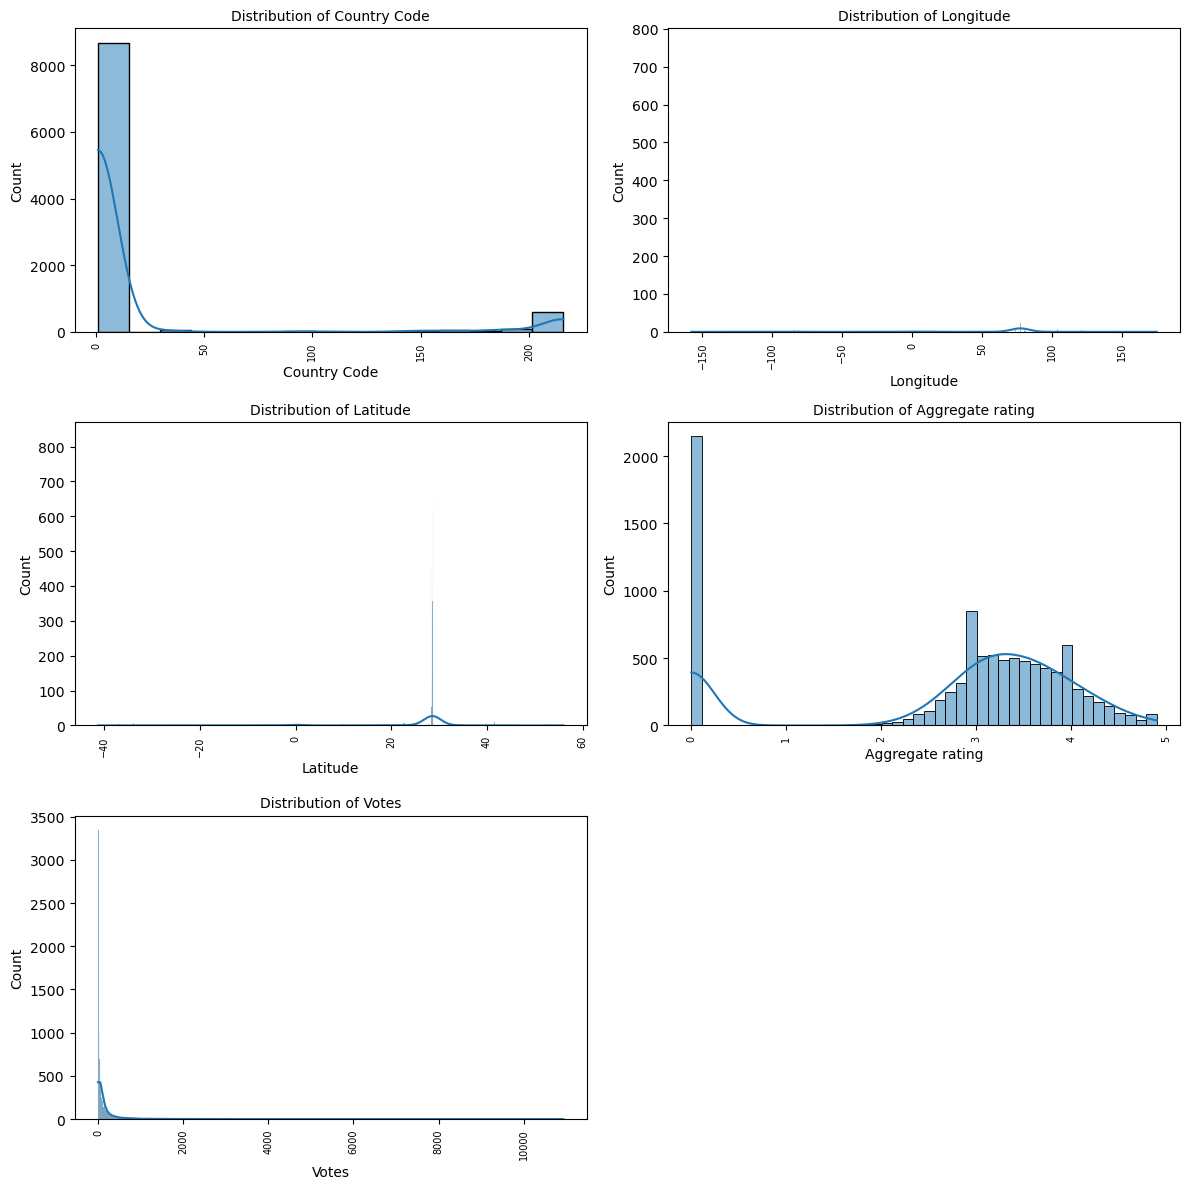

In [51]:
# plot countplots for numerical columns
plt.figure(figsize=(12, 12))

for i, col in enumerate(num_cols,1):
    plt.subplot(3,2,i)
    sns.histplot(df[col], kde=True, palette='Set2') 
    plt.title(f'Distribution of {col}', fontsize=10)
    plt.xticks(rotation=90, fontsize=7)

plt.tight_layout()
plt.show()

-country code is right skewed 
-longitude is left skewed
-latitude is also left skewed very similarly to longitude
-aggreate rating is very also left skewed
- votes is right skewed


 <div style= 'color: blue;  padding :10px;'> <h3> Univariate box plot</h3>  </div>

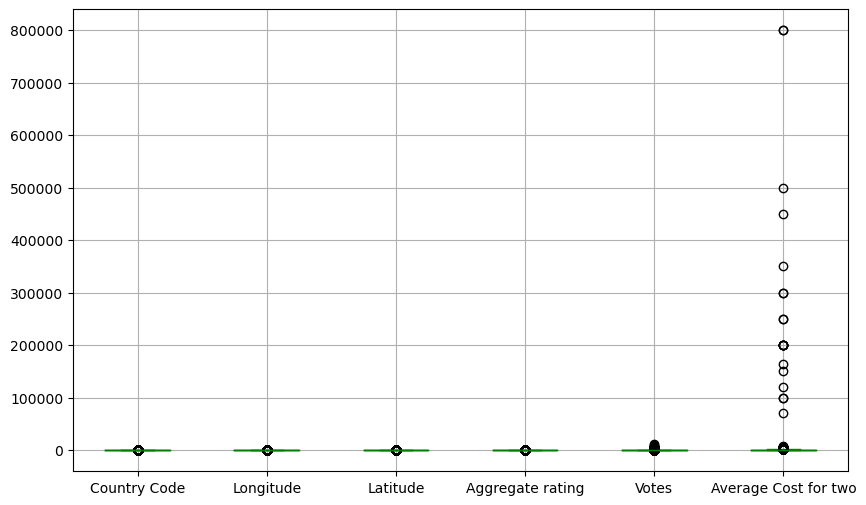

In [52]:
plt.figure(figsize=(10,6))
df.boxplot(column=num_cols + [t1], figsize=(10,10), color='green')
plt.show()


this confirms the outliers in each feature. 

- votes has a very different scale of measure

 <div style= 'background-color: orange; color: blue;  padding :10px;'> <h1>Bivariate Analysis  </h1>  </div>

 <div style= 'color: orange;  padding :10px;'> <h3> Target 1 vs Target 2 </h3>  </div>
  

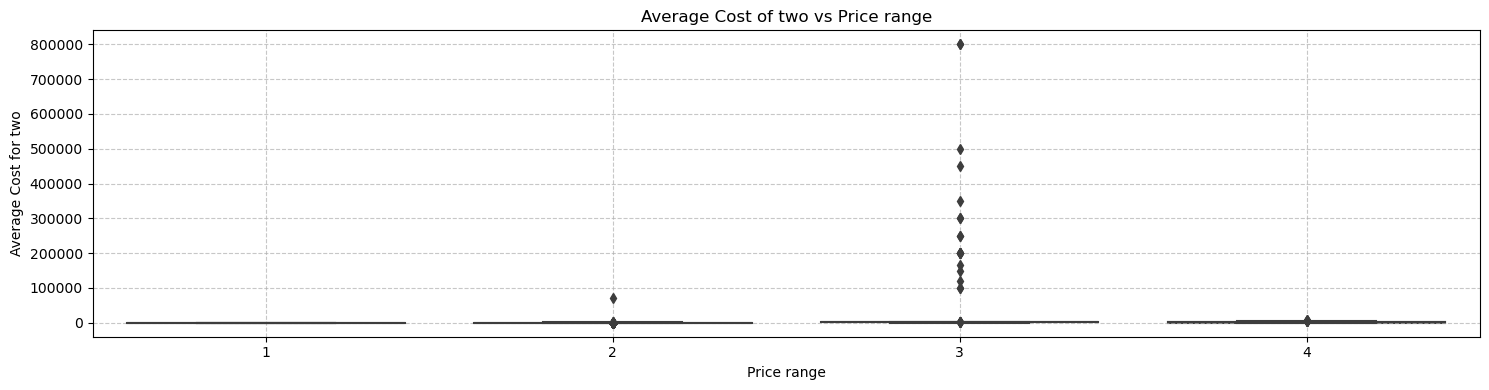

In [53]:
# create plot of 
plt.figure(figsize=(15,4))

sns.boxplot(x=t2, y=t1, data=df)
plt.ylabel(f'{t1}')
plt.xlabel(f'{t2}')
plt.title('Average Cost of two vs Price range')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

this shows that generally speaking majority of restaurants cost range is in price range 3 which is generally higher.

In [54]:
num_cols

['Country Code', 'Longitude', 'Latitude', 'Aggregate rating', 'Votes']

 <div style= 'color: orange;  padding :10px;'> <h3> Numerical features vs Target 1  </h3>  </div>
  <div style= 'color: blue;  padding :10px;'> <h4> Coutry code Vs Target 1  </h4>  </div>

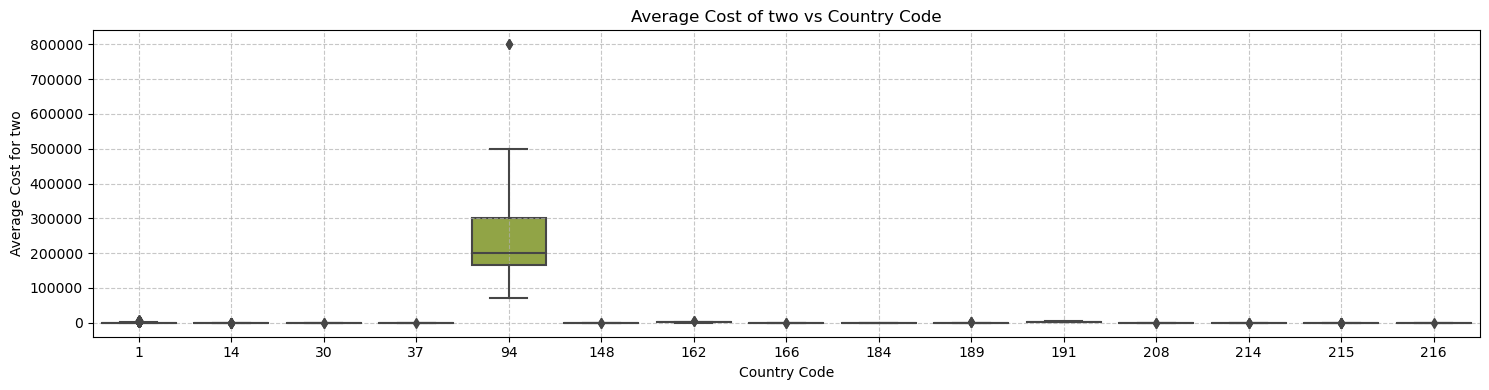

In [55]:
# create plot of 
plt.figure(figsize=(15,4))

sns.boxplot(x='Country Code', y=t1, data=df)
plt.ylabel(f'{t1}')
plt.xlabel('Country Code')
plt.title('Average Cost of two vs Country Code')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- the country with code 94 has the highest average cost for two people


 <div style= 'color: blue;  padding :10px;'> <h4> City Vs Target 1  </h4>  </div>

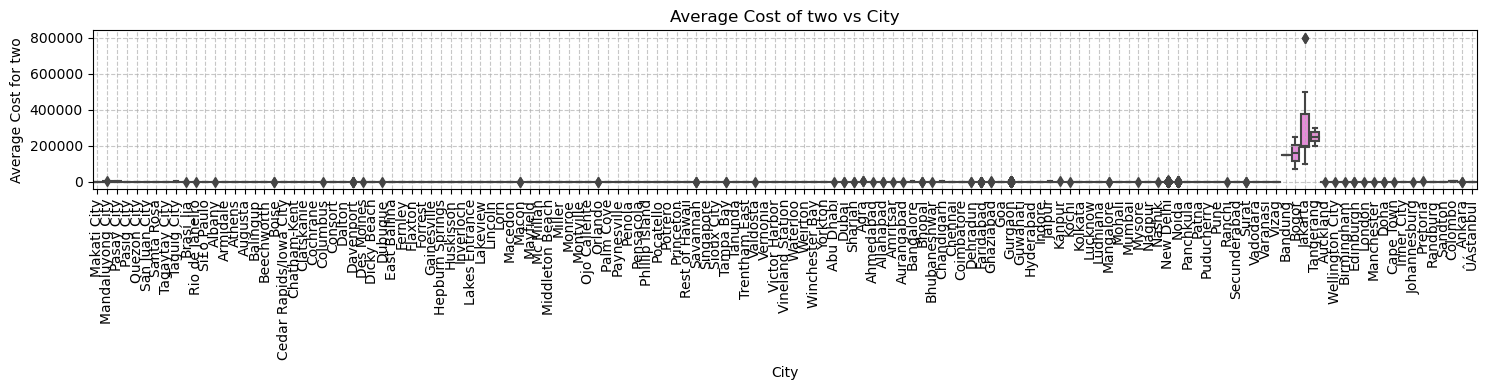

In [56]:
# create plot of 
plt.figure(figsize=(15,4))

sns.boxplot(x='City', y=t1, data=df)
plt.ylabel(f'{t1}')
plt.xlabel('City')
plt.xticks(rotation=90)
plt.title('Average Cost of two vs City')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- 3 cities have much higher prices thantthe rest... Jakarta, Tangerand and Bogot

 <div style= 'color: blue;  padding :10px;'> <h4> Aggregate rating Vs Target 1  </h4>  </div>

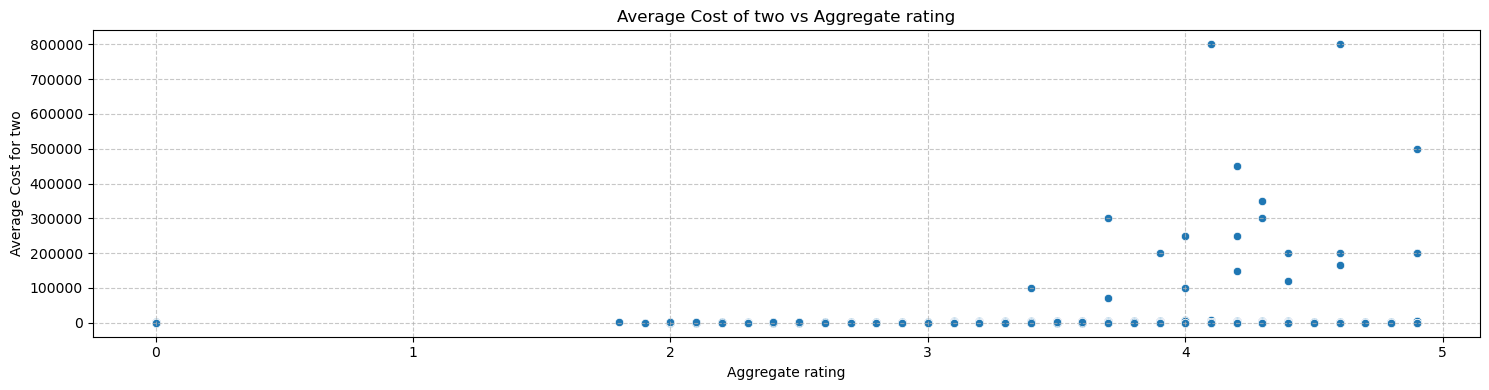

In [57]:
# create plot of 
plt.figure(figsize=(15,4))

sns.scatterplot(x='Aggregate rating', y=t1, data=df)
plt.ylabel(f'{t1}')
plt.xlabel('Aggregate rating')
plt.title('Average Cost of two vs Aggregate rating')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- the higher the rating of the restuarant the more likely the price for two will be higher

 <div style= 'color: blue;  padding :10px;'> <h4> Cuisine_type Vs Target 1  </h4>  </div>

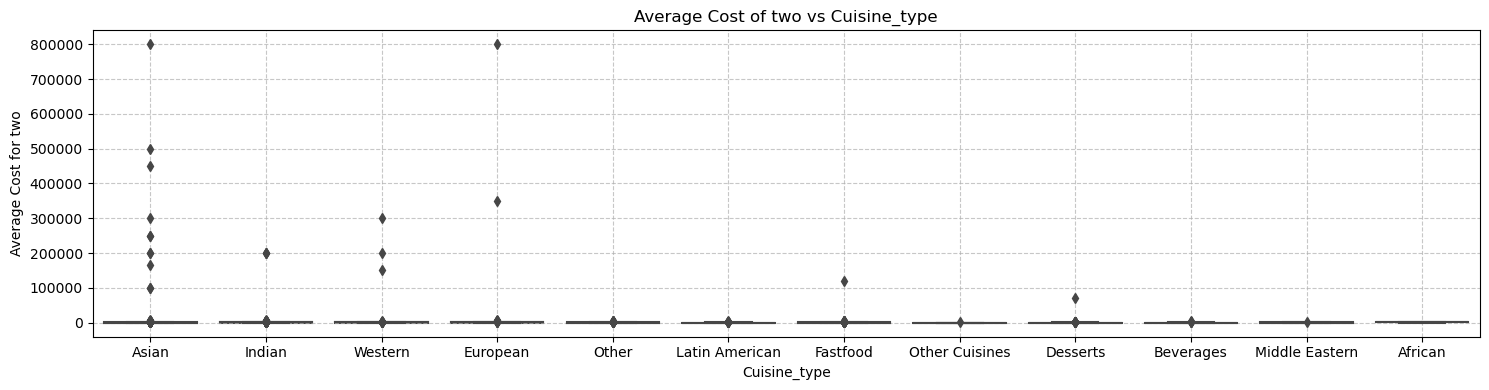

In [58]:
# create plot of 
plt.figure(figsize=(15,4))

sns.boxplot(x='Cuisine_type', y=t1, data=df)
plt.ylabel(f'{t1}')
plt.xlabel('Cuisine_type')
plt.title('Average Cost of two vs Cuisine_type')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

 <div style= 'color: blue;  padding :10px;'> <h4> Votes Vs Target 1  </h4>  </div>

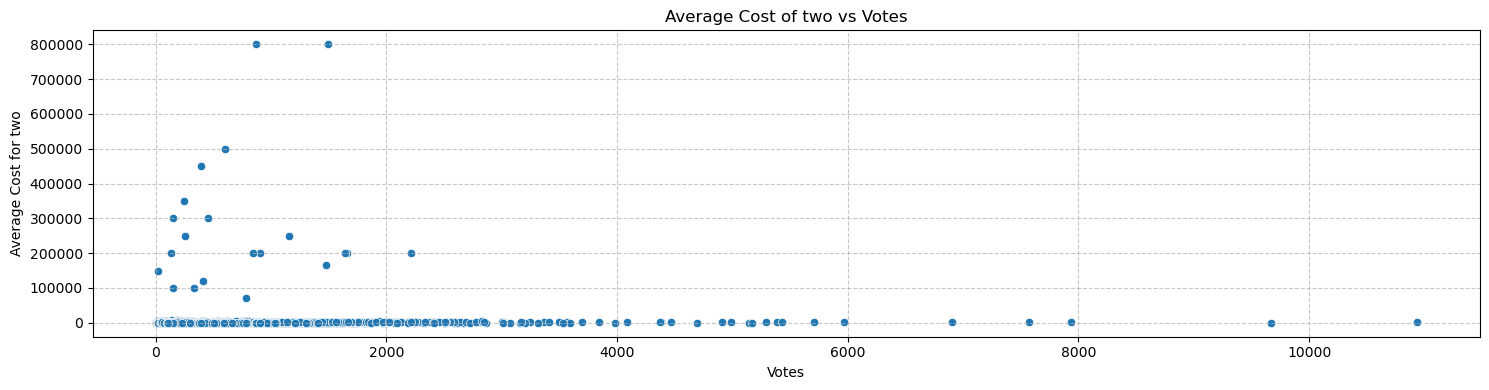

In [59]:
# create plot of 
plt.figure(figsize=(15,4))

sns.scatterplot(x='Votes', y=t1, data=df)
plt.ylabel(f'{t1}')
plt.xlabel( 'Votes')
plt.title('Average Cost of two vs Votes')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- this shows that many restaurants have no votes, and restaurans with much hieher prices all have less than 2000 votes.

 <div style= 'color: blue;  padding :10px;'> <h4> Country Code Vs Target 2  </h4>  </div>

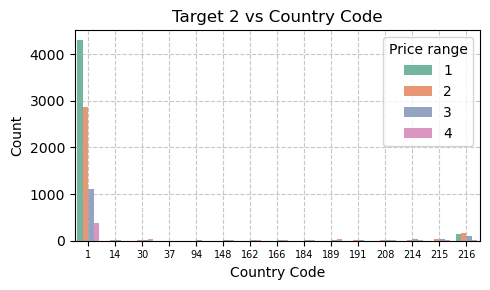

In [60]:
# create plot of age against target
plt.figure(figsize=(5,3))

sns.countplot(x='Country Code', hue=t2,data=df, palette='Set2')
plt.xlabel('Country Code')
plt.ylabel('Count')
plt.title('Target 2 vs Country Code')
plt.xticks(rotation=0, fontsize=7)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



- this shows the overwhelming majority of restaurants are in india and most have the price within range 1.

 <div style= 'color: blue;  padding :10px;'> <h4> Country Code Vs Target 2  </h4>  </div>

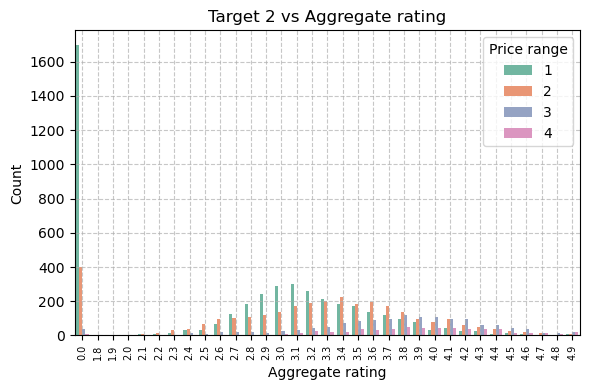

In [61]:
# create plot of age against target
plt.figure(figsize=(6,4))

sns.countplot(x='Aggregate rating', hue=t2,data=df, palette='Set2')
plt.xlabel('Aggregate rating')
plt.ylabel('Count')
plt.title('Target 2 vs Aggregate rating')
plt.xticks(rotation=90, fontsize=7)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- many restuarants have no rating but the majority of ratings that were given are between 2.7-3.2, which is average

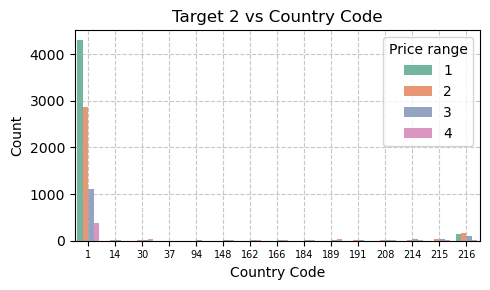

In [62]:
# create plot of age against target
plt.figure(figsize=(5,3))

sns.countplot(x='Country Code', hue=t2,data=df, palette='Set2')
plt.xlabel('Country Code')
plt.ylabel('Count')
plt.title('Target 2 vs Country Code')
plt.xticks(rotation=0, fontsize=7)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

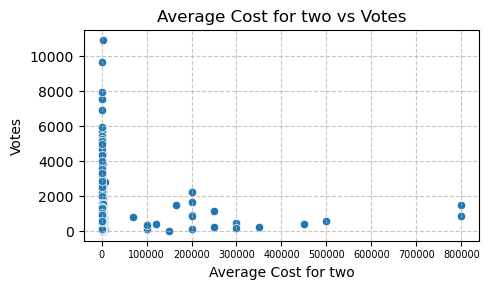

In [63]:
# create plot of age against target
plt.figure(figsize=(5,3))

sns.scatterplot(x=t1, y='Votes', data=df, palette='Set2')
plt.xlabel(f'{t1}')
plt.ylabel('Votes')
plt.title(f'{t1} vs Votes')
plt.xticks(rotation=0, fontsize=7)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

 <div style= 'color: green;  padding :10px;'> <h3> Multivariate analysis</h3>  </div>

In [64]:
#plt.figure(figsize=(15,15))
#sns.pairplot(df,hue=t1, palette='inferno', diag_kind='kde',kind='reg')

#plt.show()

In [65]:
#plt.figure(figsize=(15,15))
#sns.pairplot(df,hue=t2, palette='Dark2', diag_kind='kde',kind='reg', )
#plt.show()

 <div style= 'color: orange;  padding :10px;'> <h3> Heatmap of Correlation</h3>  </div>

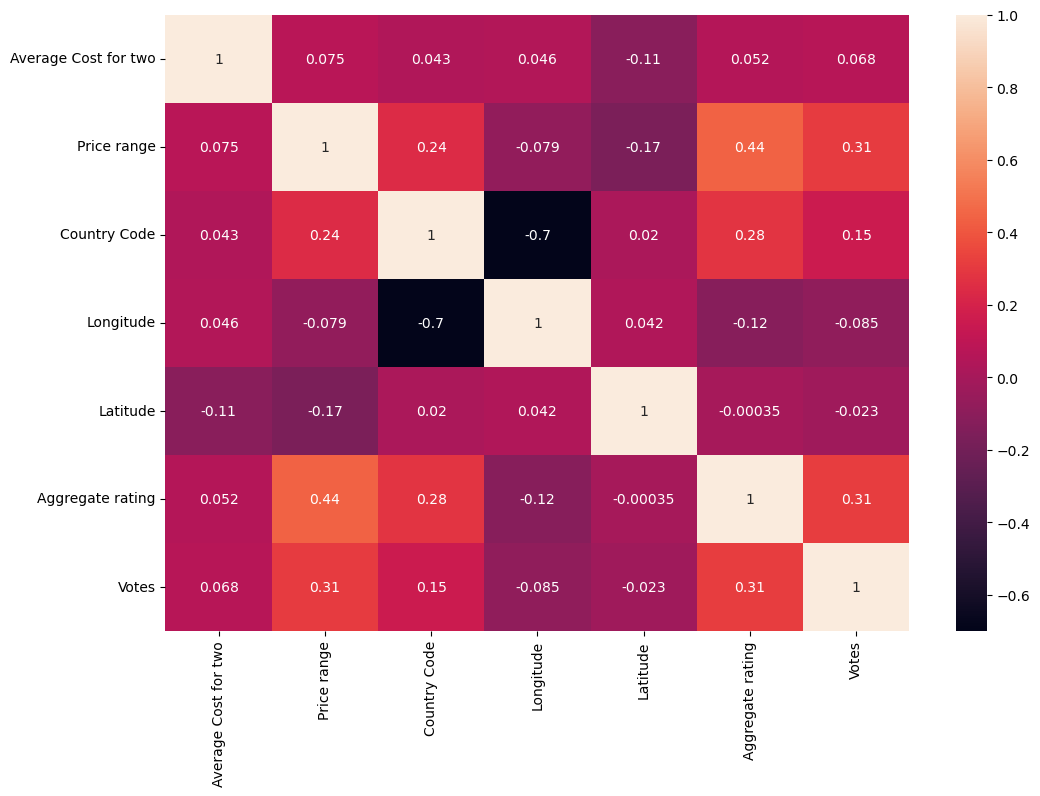

In [66]:
plt.figure(figsize=(12,8))
corr_=(df.corr())
sns.heatmap(corr_, annot=True)
plt.show()


 <div style= 'color: orange;  padding :10px;'> <h3> Encode Categorical </h3>  </div>

In [67]:
cat_cols

['City',
 'Locality',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Rating text',
 'Cuisine_type']

In [68]:
#
le=LabelEncoder()

#apply label encode 
for col in cat_cols:
    df[col]= le.fit_transform(df[col])

df.head(15)

,Average Cost for two,Price range,Country Code,City,Locality,Longitude,Latitude,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating text,Votes,Cuisine_type
1,1100,3,162,73,171,121.027535,14.565443,0,1,0,0,4.8,1,314,1
2,1200,3,162,73,593,121.014101,14.553708,0,1,0,0,4.5,1,591,1
3,4000,4,162,75,308,121.056831,14.581404,0,1,0,0,4.4,5,270,6
4,1500,4,162,75,862,121.056475,14.585318,0,0,0,0,4.9,1,365,1
5,1500,4,162,75,862,121.057508,14.584450,0,1,0,0,4.8,1,229,1
6,1000,3,162,75,862,121.056314,14.583764,0,0,0,0,4.4,5,336,1
7,2000,4,162,94,863,120.979667,14.531333,0,1,0,0,4.0,5,520,1
8,2000,4,162,94,863,120.979333,14.540000,0,1,0,0,4.2,5,677,1
9,6000,4,162,94,1001,120.980090,14.552990,0,1,0,0,4.9,1,621,6
10,1100,3,162,95,516,121.056532,14.572041,0,1,0,0,4.8,1,532,1


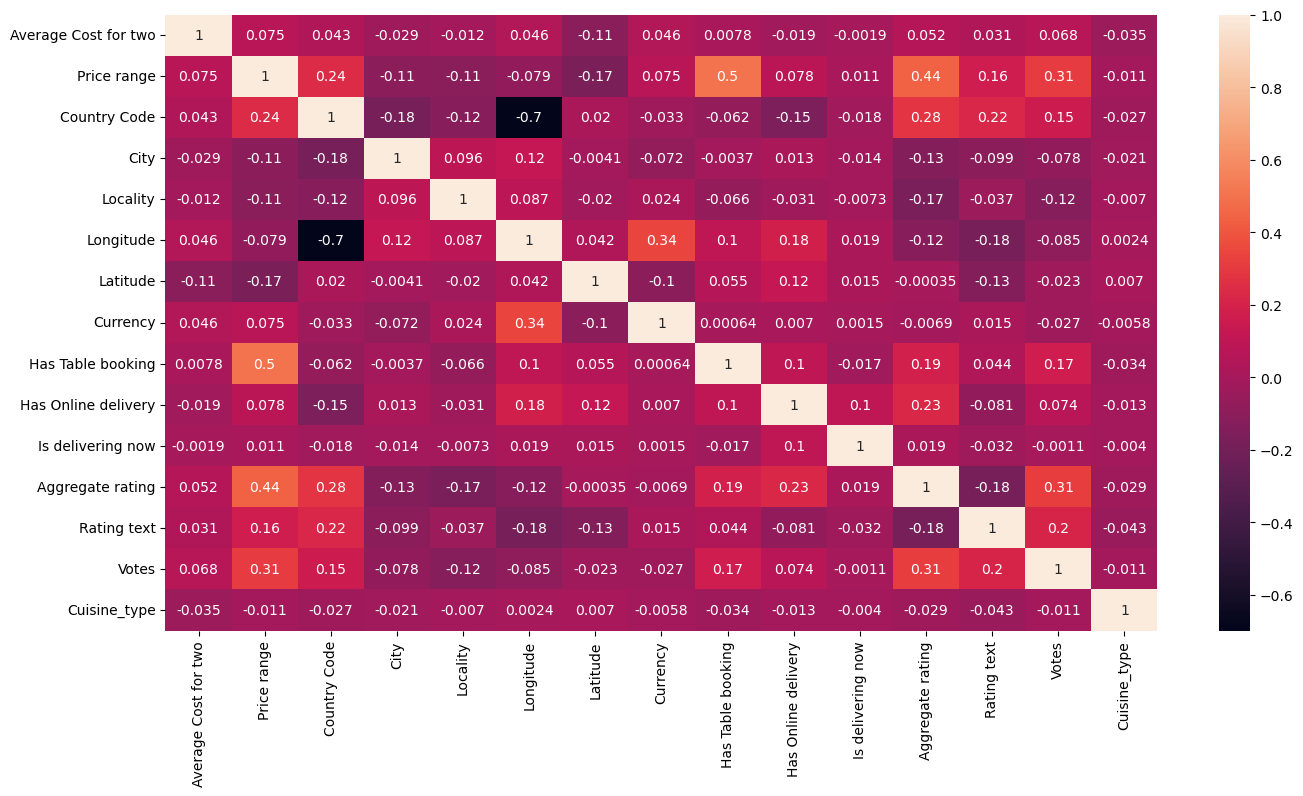

In [69]:
plt.figure(figsize=(16,8))
corr_=(df.corr())
sns.heatmap(corr_, annot=True)
plt.show()



table booking has 0.5 positive correlation with price range, then aggreagate rating at 0.44, followed by Votes at 0.31
average cost for two generally speaking has weak correlation with most features 
there is multicollinearity bewtween longitude and currency, as well as votes and aggregate rating, and aggregate rating anf coutry code

In [70]:
# list of correlation to average cost of two

rest_corr=corr_['Average Cost for two']

rest_df=rest_corr.reset_index()
rest_df.columns=['Feature', 'Average Cost for two']

rest_df=rest_df.sort_values(by='Average Cost for two', ascending=False)
rest_df

,Feature,Average Cost for two
0,Average Cost for two,1.000000
1,Price range,0.075079
13,Votes,0.067780
11,Aggregate rating,0.051788
5,Longitude,0.045884
7,Currency,0.045615
2,Country Code,0.043222
12,Rating text,0.031449
8,Has Table booking,0.007754
10,Is delivering now,-0.001863


-from the above we can see that 

In [71]:
# list of correlation to Rpice range

rest_corr2=corr_['Price range']

rest_df2=rest_corr2.reset_index()
rest_df2.columns=['Feature', 'Price range']

rest_df2=rest_df2.sort_values(by='Price range', ascending=False)
rest_df2

,Feature,Price range
1,Price range,1.000000
8,Has Table booking,0.501904
11,Aggregate rating,0.437795
13,Votes,0.309406
2,Country Code,0.243293
12,Rating text,0.164398
9,Has Online delivery,0.077818
7,Currency,0.075190
0,Average Cost for two,0.075079
10,Is delivering now,0.010930


 <div style= 'color: green;  padding :10px;'> <h3> Identify/remove outliers</h3>  </div>

In [72]:
add_to_num= ['Average Cost for two','Price range']
num_cols.extend(col for col in add_to_num if col in df.columns and df[col].dtype in [np.int64,np.float64])

In [73]:
num_cols

['Country Code',
 'Longitude',
 'Latitude',
 'Aggregate rating',
 'Votes',
 'Average Cost for two',
 'Price range']

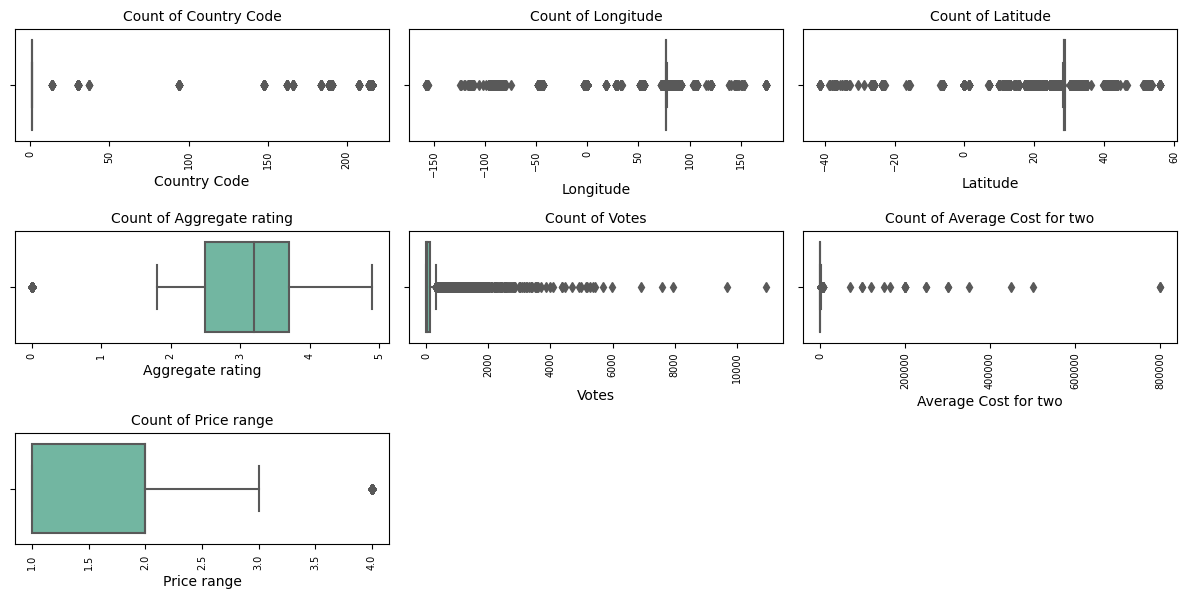

In [74]:

# plot countplots for numerical columns
plt.figure(figsize=(12, 6))

for i, col in enumerate(num_cols,1):
    plt.subplot(3,3,i)
    sns.boxplot(x=df[col], palette='Set2') 
    plt.title(f'Count of {col}', fontsize=10)
    plt.xticks(rotation=90, fontsize=7)

plt.tight_layout()
plt.show()

aggreagte rating has the least amount of outliers

 <div style= 'color: green;  padding :10px;'> <h3>Z-score</h3>  </div>

In [75]:
#- Z score Method 

# calculate z-score 

z_scores= stats.zscore(df[num_cols])

df_zscore=np.abs(z_scores)

#define threshold 
threshold =3

#create df with no outliers 
df_rest=df[(df_zscore < threshold).all(axis=1)]

print('The new dataframe without outliers:', df_rest.shape)
print('Percentage of data loss', (df.shape[0]-df_rest.shape[0])/df.shape[0]*100,'%')
df_rest.sample(5)

The new dataframe without outliers: (8563, 15)
Percentage of data loss 10.325688553775263 %


,Average Cost for two,Price range,Country Code,City,Locality,Longitude,Latitude,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating text,Votes,Cuisine_type
8644,1300,3,1,89,930,77.360571,28.565447,4,0,1,1,3.0,0,6,6
2209,200,1,1,50,1113,77.067344,28.490722,4,0,0,0,0.0,3,0,6
2706,650,2,1,88,71,77.173635,28.687307,4,0,0,0,3.2,0,22,6
3341,750,2,1,88,285,77.206967,28.573309,4,0,0,0,3.2,0,26,6
4153,500,2,1,88,477,77.101117,28.625289,4,0,1,0,2.2,4,19,5


 <div style= 'color: green;  padding :10px;'> <h3> Skewness</h3>  </div>

In [76]:
skew_cols=num_cols

In [77]:
skew_=df_rest[skew_cols].skew()

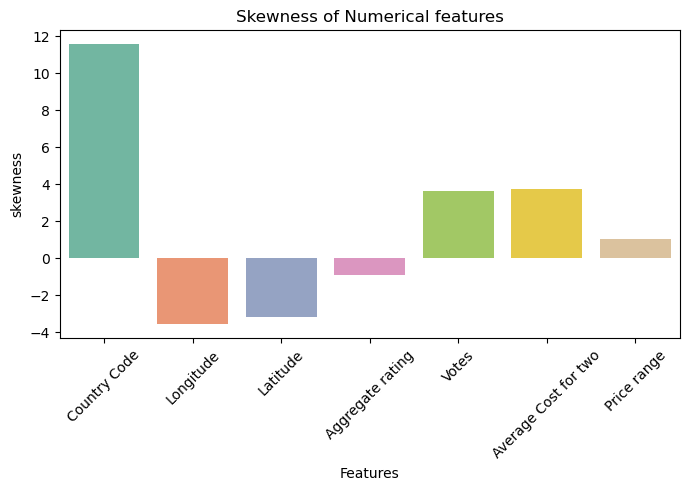

In [78]:
#
plt.figure(figsize=(8,4))
sns.barplot(x=skew_.index, y=skew_.values, palette='Set2')
plt.title('Skewness of Numerical features')
plt.xlabel('Features')
plt.ylabel('skewness')
plt.xticks(rotation=45)
plt.show()

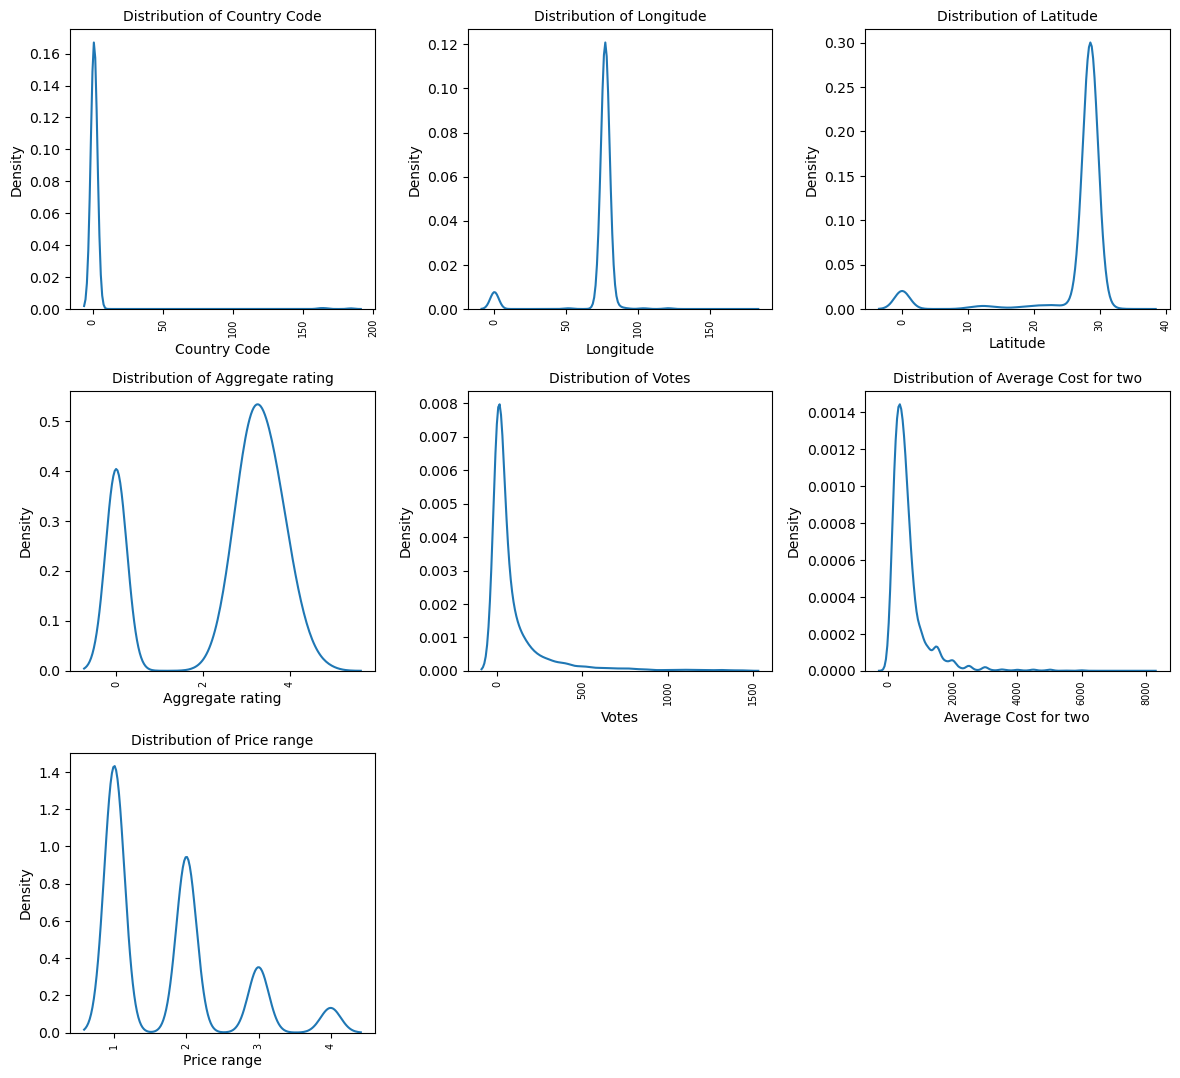

In [79]:
# plot countplots for numerical columns
plt.figure(figsize=(12, 25))

for i, col in enumerate(num_cols,1):
    plt.subplot(7,3,i)
    sns.kdeplot(df_rest[col], palette='Set2') 
    plt.title(f'Distribution of {col}', fontsize=10)
    plt.xticks(rotation=90, fontsize=7)

plt.tight_layout()
plt.show()


In [80]:
skew_.sort_values().to_frame('Skew')

,Skew
Longitude,-3.537228
Latitude,-3.186522
Aggregate rating,-0.878102
Price range,1.028915
Votes,3.653425
Average Cost for two,3.718264
Country Code,11.592550


all numerical columns hav a skew above 0.5 and below -0.5

In [81]:
#
for col in skew_.index:
    if skew_[col] >0.5 or skew_[col] <-0.5 :
        print(f'Feature: {col}')
        
        #
        log_t=np.log1p(df_rest[col])
        log_skew=log_t.skew()
        print(f'Log transform skewness = {log_skew}')
        
        #
        sqrt_t=np.sqrt(df_rest[col].replace(0,np.nan))
        sqrt_skew=sqrt_t.skew()
        print(f'Square root skewness = {sqrt_skew}')
        
        #
        cbrt_t=np.cbrt(df_rest[col])
        cbrt_skew=cbrt_t.skew()
        print(f'Cube root skewness = {cbrt_skew}')
        
        #  
        most_suit= min(
            [('Log Transform', log_skew),
             ('Square Root Transform', sqrt_skew),
             ('Cube Root Transform', cbrt_skew)],
        key=lambda x: abs(x[1])
        )
        
        print(f'\n Most suitable Transformation is {most_suit[0]} with skewness {most_suit[1]}')
        
     
        print('_'*30)



Feature: Country Code
Log transform skewness = 11.534374557423751
Square root skewness = 11.548853337191524
Cube root skewness = 11.541214704849798

 Most suitable Transformation is Log Transform with skewness 11.534374557423751
______________________________
Feature: Longitude
Log transform skewness = -3.785689112370914
Square root skewness = 5.852207455053911
Cube root skewness = -3.7736689016332674

 Most suitable Transformation is Cube Root Transform with skewness -3.7736689016332674
______________________________
Feature: Latitude
Log transform skewness = -3.6040334638702856
Square root skewness = -6.923068204704226
Cube root skewness = -3.6040707342450498

 Most suitable Transformation is Log Transform with skewness -3.6040334638702856
______________________________
Feature: Aggregate rating
Log transform skewness = -1.0751701463786116
Square root skewness = 0.020038225357594638
Cube root skewness = -1.1236241323558402

 Most suitable Transformation is Square Root Transform with 

In [82]:
#apply transformation to each feature
#boxcox
df_rest['Country Code'], _=boxcox(df_rest['Country Code']+1)
df_rest['Latitude'], _=boxcox(df_rest['Latitude']+1)
df_rest['Aggregate rating'], _=boxcox(df_rest['Aggregate rating']+1)

#log
df_rest['Average Cost for two']=np.log1p(df_rest['Average Cost for two'])
df_rest['Votes']=np.log1p(df_rest['Votes'])
df_rest['Longitude']=np.log1p(df_rest['Longitude'])
#yeo
#yeo-johson method
#pt=PowerTransformer(method='yeo-johnson')
#df_rest[['Longitude']]=pt.fit_transform(df_rest[['Longitude']])
#
df_rest['Price range']=np.cbrt(df_rest['Price range'])


print(df_rest['Country Code'].skew())
print(df_rest['Longitude'].skew())
print(df_rest['Latitude'].skew())
print(df_rest['Aggregate rating'].skew())
print(df_rest['Votes'].skew())
print(df_rest['Average Cost for two'].skew())
print(df_rest['Price range'].skew())

0
-3.785689112370914
-2.533799570403693
-0.6311880159643666
-0.052855546259909285
-0.3518365402811369
0.6138315055544943


In [83]:
#apply transformation to each feature
#boxcox

df_rest['Price range'], _=boxcox(df_rest['Price range']+1)

pt=PowerTransformer(method='yeo-johnson')
df_rest[['Latitude','Longitude']]=pt.fit_transform(df_rest[['Latitude', 'Longitude']])

pt=PowerTransformer(method='yeo-johnson')
df_rest[['Aggregate rating']]=pt.fit_transform(df_rest[['Aggregate rating']])

print(df_rest['Price range'].skew())
print(df_rest['Latitude'].skew())
print(df_rest['Longitude'].skew())
print(df_rest['Aggregate rating'].skew())

0.22025702110147202
-2.4816961398717026
-2.8560387595366064
-0.5472611280730492


In [84]:
df_rest[num_cols].skew()

Country Code            0.000000
Longitude              -2.856039
Latitude               -2.481696
Aggregate rating       -0.547261
Votes                  -0.052856
Average Cost for two   -0.351837
Price range             0.220257
dtype: float64

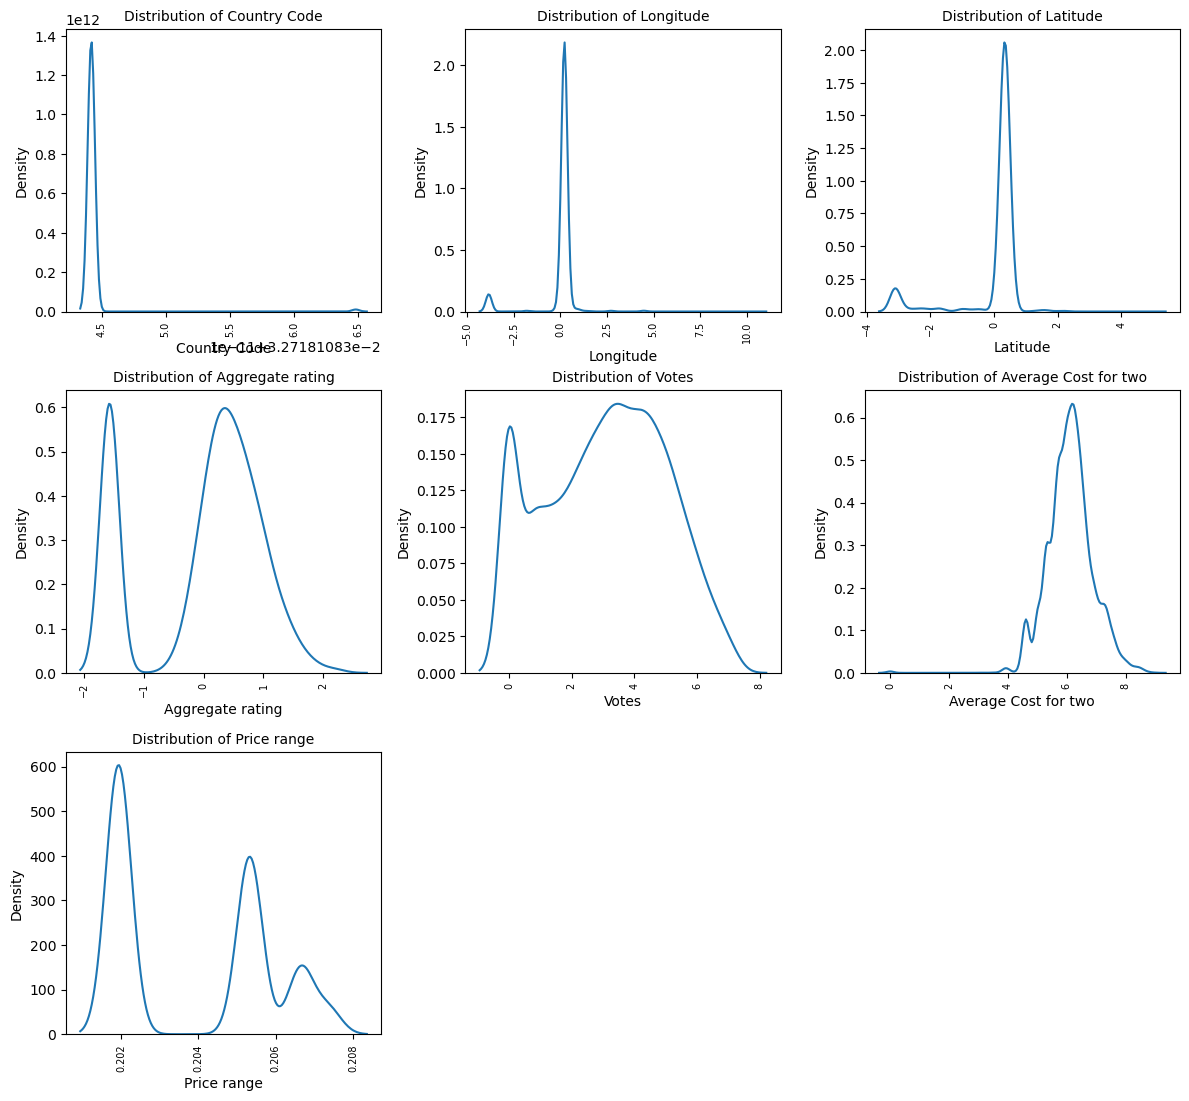

In [85]:
# plot countplots for numerical columns
plt.figure(figsize=(12, 25))

for i, col in enumerate(num_cols,1):
    plt.subplot(7,3,i)
    sns.kdeplot(df_rest[col], palette='Set2') 
    plt.title(f'Distribution of {col}', fontsize=10)
    plt.xticks(rotation=90, fontsize=7)

plt.tight_layout()
plt.show()


 <div style= 'color: green;  padding :10px;'> <h3> Train/Test split</h3>  </div>

In [97]:
X=df_rest.drop('Average Cost for two', axis=1)
Y=df_rest['Average Cost for two']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

print(f'Training features dimension:,{X.shape}')
print(f'Testing features dimension:,{X_test.shape}')
print(f'Training features dimension:,{Y.shape}')
print(f'Testing features dimension:,{Y_test.shape}')

Training features dimension:,(8563, 14)
Testing features dimension:,(2141, 14)
Training features dimension:,(8563,)
Testing features dimension:,(2141,)


 <div style= 'color: green;  padding :10px;'> <h3> Standard Scaler</h3>  </div>

In [98]:
scaler = StandardScaler()

X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X

,Price range,Country Code,City,Locality,Longitude,Latitude,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating text,Votes,Cuisine_type
0,1.367611,11.615539,-0.350390,-1.639201,4.474043,-2.898536,-13.446195,2.651949,-0.618078,-0.063138,2.112637,-0.396099,1.396424,-2.060856
1,1.367611,11.615539,-0.350390,-0.261773,4.472623,-2.899249,-13.446195,2.651949,-0.618078,-0.063138,1.747013,-0.396099,1.724797,-2.060856
2,1.719930,11.615539,-0.246421,-1.192026,4.477139,-2.897563,-13.446195,2.651949,-0.618078,-0.063138,1.629032,2.085553,1.318119,0.348569
3,1.719930,11.615539,-0.246421,0.616256,4.477101,-2.897324,-13.446195,-0.377081,-0.618078,-0.063138,2.238395,-0.396099,1.474524,-2.060856
4,1.719930,11.615539,-0.246421,0.616256,4.477210,-2.897377,-13.446195,2.651949,-0.618078,-0.063138,2.112637,-0.396099,1.232744,-2.060856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8558,1.719930,11.615539,-2.169850,1.272329,-1.817462,-1.021944,13.482360,-0.377081,-0.618078,-0.063138,1.068461,0.224314,1.154774,-2.060856
8559,1.719930,11.615539,-2.169850,1.347402,-1.817219,-1.012691,13.482360,-0.377081,-0.618078,-0.063138,1.629032,2.085553,0.598532,1.794224
8560,1.719930,11.615539,-2.169850,1.366987,-1.818424,-1.037965,13.482360,-0.377081,-0.618078,-0.063138,1.513002,2.085553,0.642541,-2.060856
8561,1.719930,11.615539,-2.169850,1.442060,-1.816207,-1.039037,13.482360,-0.377081,-0.618078,-0.063138,1.747013,-0.396099,0.996212,-0.615201


 <div style= 'color: green;  padding :10px;'> <h3> VIF</h3>  </div>

In [99]:
#find VIR for each column 

vif= pd.DataFrame()
vif['Features']= X.columns
vif['VIF Factor']=[variance_inflation_factor(X.values, i) for i in range (len(X.columns))]

vif.sort_values(by='VIF Factor', ascending=False)

,Features,VIF Factor
12,Votes,4.987808
10,Aggregate rating,4.425997
5,Latitude,3.033664
4,Longitude,2.987419
0,Price range,1.758680
7,Has Table booking,1.394226
6,Currency,1.327174
1,Country Code,1.299689
8,Has Online delivery,1.239638
11,Rating text,1.182571


 <div style= 'color: blue;  padding :10px;'> <h3> Logistic Regression</h3>  </div>

In [101]:
maxAccu=0
maxRS=0

for i in range(1,200):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=i)
    
    
    lr=LinearRegression()
    lr.fit(X_train,Y_train)
    pred=lr.predict(X_test)
    acc=r2_score(Y_test, pred)

    if acc >maxAccu:
        maxAccu = acc
        maxRS= i
        
print(f'Maximum r2 score is {maxAccu} at random state {maxRS}')


Maximum r2 score is 0.7633264298321936 at random state 183


In [102]:
# create split 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=maxRS)

In [104]:
lr=LinearRegression()
lr.fit(X_train,Y_train)
pred_lr=lr.predict(X_test)
pred_train=lr.predict(X_train)

print(lr)

print('R2 score:', r2_score(Y_test, pred_lr))
print('r2 score on training data:', r2_score(Y_train, pred_train)*100)
print('Mean absolute Error:', mean_absolute_error(Y_test, pred_lr))
print('Mean squared Error:', mean_squared_error(Y_test, pred_lr))
print('Root mean squared Error:', np.sqrt(mean_squared_error(Y_test, pred_lr)))

LinearRegression()
R2 score: 0.7633264298321936
r2 score on training data: 69.32816398277382
Mean absolute Error: 0.28315642949133163
Mean squared Error: 0.13415001682697025
Root mean squared Error: 0.36626495440728457


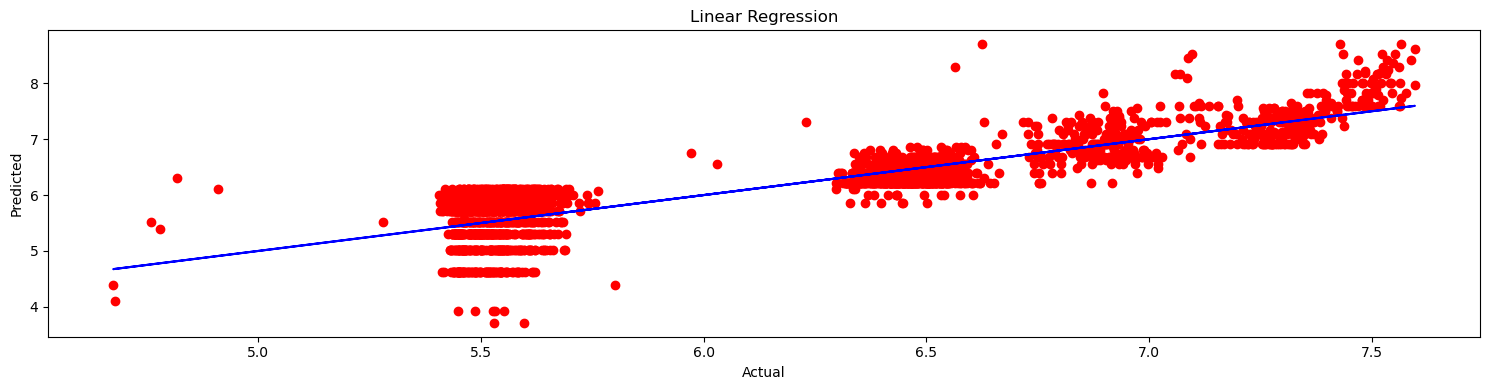

In [106]:
# create plot of 
plt.figure(figsize=(15,4))

plt.scatter(x=pred_lr, y=Y_test, color='r')
plt.plot(pred_lr, pred_lr, color='b')
plt.xlabel( 'Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')


plt.tight_layout()
plt.show()